# Introduction to R & Jupyter Notebooks
# Data Manipulation

Matthew D. Turner, PhD  
Georgia State University

Some rights reserved: [cc by-nc-sa](https://creativecommons.org/licenses/by-nc-sa/4.0/) See bottom of document for details.
***
In this section of the workshop we will look at the related problems of

+ Data Structures
+ Loading Data
+ Referencing Data
+ Indexing
+ Subsetting Data

This is a little boring but it is usually 90% of the work you have to do in data-oriented research, so we need to get it right. Bear with me.

## 3.1 Data Structures (Data Frames)
### Time Series
The primary way to hold data sets in R is with a **data frame**. A data frame is basically a little spreadsheet that you can manipulate and refer to in other calculations. Let's look at some examples.

Previously you loaded the `datasets` package that contains a lot of little data frames to let you experiment with techniques. Let's use that again.

In [1]:
# Load the datasets package and list the data sets (you've seen this before!)

library(datasets)
# library(help = "datasets")  # Uncomment this line to see the list of data again

Let's start with something that is **not** a data frame so that we have a comparison. R has various data types and some items work well as one type an not as others. One specialized type is a **time series** data set.

In [2]:
data(discoveries)    # Load the data
discoveries          # Typing its name shows us the data on the screen

Time Series:
Start = 1860 
End = 1959 
Frequency = 1 
  [1]  5  3  0  2  0  3  2  3  6  1  2  1  2  1  3  3  3  5  2  4  4  0  2  3  7
 [26] 12  3 10  9  2  3  7  7  2  3  3  6  2  4  3  5  2  2  4  0  4  2  5  2  3
 [51]  3  6  5  8  3  6  6  0  5  2  2  2  6  3  4  4  2  2  4  7  5  3  3  0  2
 [76]  2  2  1  3  4  2  2  1  1  1  2  1  4  4  3  2  1  4  1  1  1  0  0  2  0

This data set is the count of "important" discoveries per year, for the years from 1860 to 1959. To learn more about the data set, you could type `?discoveries` but don't bother, the people who added this to R did not know what "important" meant, either.

Time series is usually best viewed as a plot. For many data sets, R will make reasonable default plots. For a time series like this, you can literally just say `plot(discoveries)` and the result is not bad.

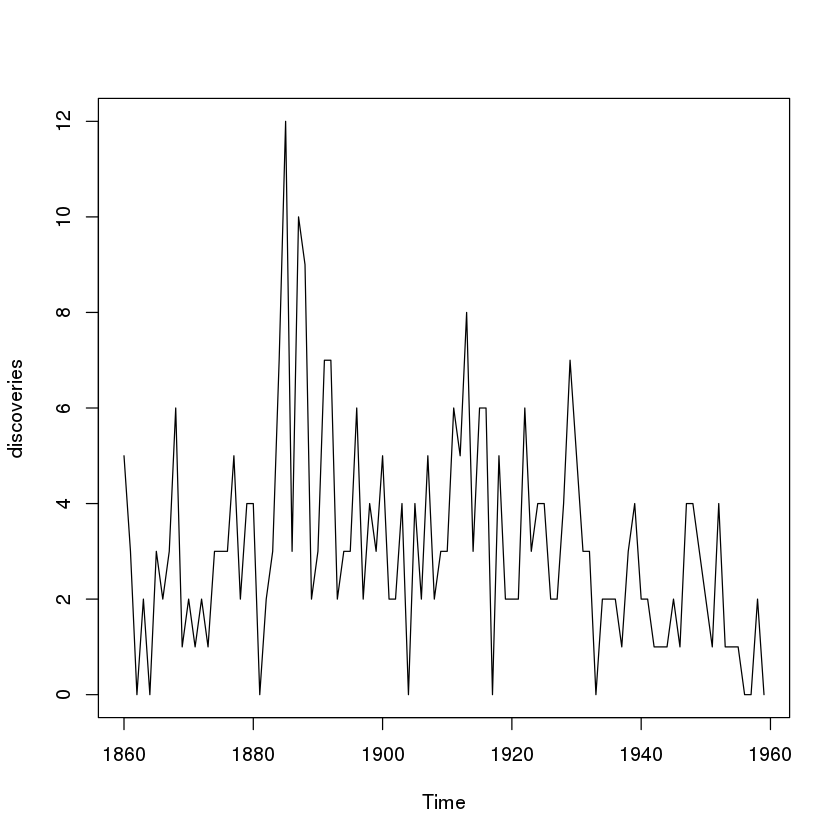

In [3]:
plot(discoveries)

Now that is way too big for some laptop screens. So let's tune the options. 

> **Note!** If the plot above is already reduced in size (so that it looks the same as the next one) then your current session of R is still using options set from a previous run of something. It happened to me, too. Nothing bad has happened. I just did not want you staring at two identical plots and wondering what you were missing.

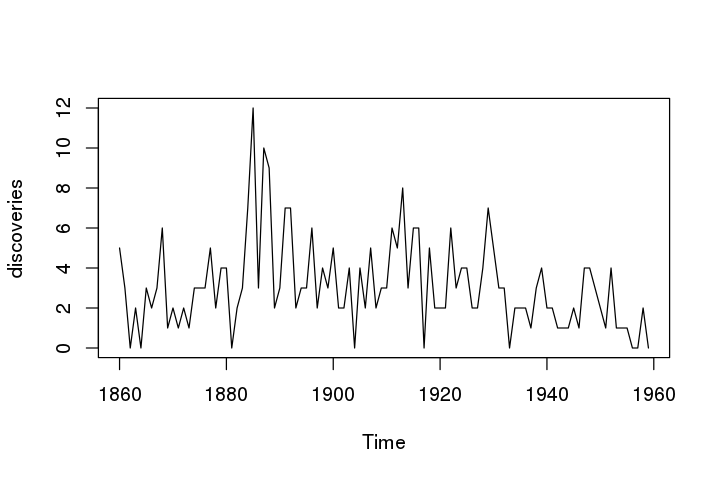

In [4]:
options(repr.plot.width=6, repr.plot.height=4) # Set plot height and width (in inches)
plot(discoveries)

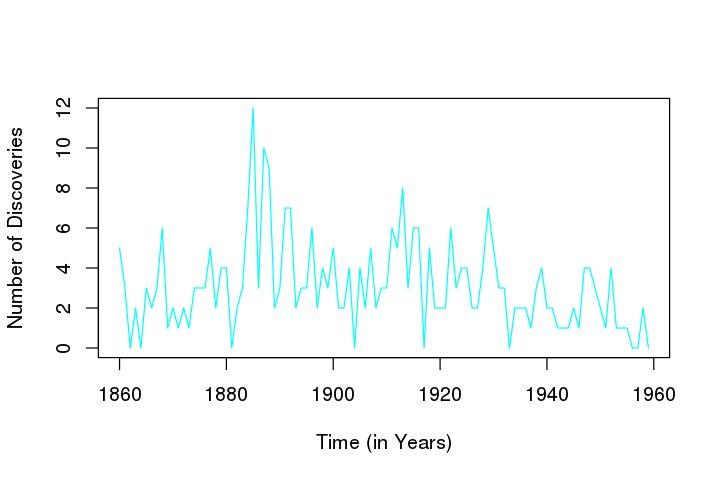

In [5]:
# We can also clean up the titles and make the figure "pretty"
# See if you can figure this out before you press shift-enter to run it

plot(discoveries, xlab = 'Time (in Years)', ylab = 'Number of Discoveries', col = "cyan")

In [6]:
# Exercise: Get the mean and standard deviation of the discoveries timeseries
# You use these functions previously



One function you will use a lot is `summary`. When applied to a time series, it gives a quick statistical summary of the variable. For people who come from disciplines the use the mean and standard deviation, this output may seem weird. 

For each **numerical** variable, R gives the minimum, maximum, median, first quartile, and third quartile. In the original language this is all that was given, but over time the mean was squeezed into the list as well, due to the demands of people from mean-centered disciplines.

In [7]:
# Exercise: Use the summary function on the discoveries time series
# Hint: It *is* as simple as it sounds



### Data Frames
Time series are special, in most data sets we need to have multiple columns, one for each variable, and multiple rows, one for each observation (i.e. subject/object/thing/trial/etc.) Remember that, it is the usual format for statistics: **columns are variables** and **rows are observational units**. This is how data frames are organized. Let's see one &emdash; we will start with the famous _Motor Trend_ Cars dataset. 

In [8]:
data(mtcars)   # Load the data (for some data sets this is optional)
head(mtcars)   # Head shows the first few rows of a data frame
dim(mtcars)    # Short for dimension
               # Gives the number of ROWS (cars in this case) and COLS (measurements on cars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


[1] 32 11

Compare this to the `discoveries` time series. Here we have different models of car, and for each car we have miles per gallon (mpg), number of cylinders in the engine (cyl), horse power (hp), and type of transmission (am; 0 = automatic, 1 = manual), among other variables.

The data frame is an easy way to keep the measurements on each car together with the name of the car. 

### Indexing Data Frames
We can refer to each row or column in a variety of ways, and we can pick out the bits of the data frame that we want and ignore the rest. We can also make new data frames out of old ones.

> **Important Note** Look carefully are the next example and notice that it uses **square** brackets `[` and `]`, while functions (above) use the **round** ones, `(` and `)`. It is important to use round for functions and square for indexing. You **will** eventually mess this up, it happens to all of us.

In [9]:
# Pick out 1st row:

mtcars[1,]   # Note the comma and the nothing after it! and the SQUARE brackets

# The first 5 rows:

mtcars[1:5,] # Remember the colon operator from before? You could use seq here, too!

# The first column of measurements:

mtcars[,1]   # Note the comma and the empty space for row
             #    Also, this is formatted differently

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

In [10]:
# Slightly more advanced exercise! Talk to your teammates.
#
# Pick out the ODD rows from the data frame
# Hint (1): Use the seq function from the previous notebook for the rows (? can help)
# Hint (2): You need to know the number of rows to make this work (look above)
# Hint (3): Remember to use the correct brackets (square or round)



Remember when I said that `seq` stopping early would help you out? Someday it will dawn on you why that was important here. If it hasn't already.

You can refer to columns by name. As we often want to analyze variables, we often need to pick out entire columns.

In [11]:
mtcars[,"mpg"]  # This list is the same as the one above

# Use c() -- catenate -- to make a list of columns you want:

mtcars[, c("mpg", "hp", "am")]  # This drops the other columns

newcar <- mtcars[, c("mpg", "hp", "am")]  # What does this do?
                                          # Does it print anything below?

[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

,mpg,hp,am
Mazda RX4,21.0,110,1
Mazda RX4 Wag,21.0,110,1
Datsun 710,22.8,93,1
Hornet 4 Drive,21.4,110,0
Hornet Sportabout,18.7,175,0
Valiant,18.1,105,0
Duster 360,14.3,245,0
Merc 240D,24.4,62,0
Merc 230,22.8,95,0
Merc 280,19.2,123,0


The `summary` function also works woth data frames. When applied to these, it gives a quick statistical summary of the variables. For each **numerical** variable, R gives the minimum, maximum, median, first quartile, and third quartile. If it finds any non-numerical variables, it gives a partial tabulation.

In [12]:
summary(newcar)

      mpg              hp              am        
 Min.   :10.40   Min.   : 52.0   Min.   :0.0000  
 1st Qu.:15.43   1st Qu.: 96.5   1st Qu.:0.0000  
 Median :19.20   Median :123.0   Median :0.0000  
 Mean   :20.09   Mean   :146.7   Mean   :0.4062  
 3rd Qu.:22.80   3rd Qu.:180.0   3rd Qu.:1.0000  
 Max.   :33.90   Max.   :335.0   Max.   :1.0000  

To get the means (`mean` function) and standard deviations (the `sd` function) you have to pick out the whole variable, that is, you can **not** apply these to the whole data frame.

In [13]:
# Obtain the mean and standard deviation of the mpg variable in the newcar
# data frame; remember you have to pick out the variable like you did above



As we will do this operation (picking out a column) a **lot**, there is a shorthand notation for it:

```R
dataFrameName$columnName
```

So, for the cell you just did, you can use `mtcars$mpg` where you used `mtcars[,"mpg"]`.

In [15]:
# Print the values inside of the am variable from the newcar frame
# Use mean and sd to summarize the am variable 
# Use $ here!



### Variable Transformation
Although we can be sloppy sometimes, it is good to make sure that R knows what the numbers we use represent. When we started looking at `mtcars` we said that `am` was the **type** of transmission, either automatic (0) or manual (1). 

Well, what do the mean and standard deviation of _type of transmission_ mean? Nothing really. The mean, approximately 0.406, tells us that most cars are automatic (why?) but not much else.

When R loaded this data it did not know that the 1's and 0's in this variable were **names**, not really numbers. (In psychology, numbers as names are called a _nominal scale_; in several fields we might also call a variable like `am` a _categorical variable_.) We can fix this.

Categorical variables are sometimes called **factors** and R will allow us to tell it when we have a factor. We do this with the `factor` function. In a moment we are going to use this function, but when we do we are going to introduce a new idiom, commonly used in computer science. Here is the code we will use in a moment:

```
newcar$am <- factor(newcar$am)
```

Notice that `newcar$am` appears on both sides of the equals sign. Remember that in an assignment operation, we put the result into whatever is on the left hand side **after** doing the operation on the right hand side. So in this command we are telling R:

1. Get whatever is stored in `newcar$am`
1. Give this to the `factor` function
1. Take the output of `factor` and place this result into the variable name on the right hand side of the arrow (or equals sign); this just happens to be the same variable name `newcar$am`, so the original data will be **replaced** with the new data

In computing we always do what is on the _right hand side_ of the assignment operator (see notebook 2 for more on assignments) first, then put it into the name on the left!

In [ ]:
# Convert the am variable in newcar to a factor (use command shown)
# Then use summary on newcar, again



Compare the output from the cell just above to what we got earlier. 

>**Important Note** If you **re-run** the cell further above were I originally put the command to do a summary, it will give you the **same** output as you just got. Always remember that changes we make to our data are **persistent**.

Notice that the `summary` command gives different output for categorical/nominal variables than it gives for numbers.

## 3.2 Loading Data
In this workshop we will focus on the most basic method of loading data, reading it in from a CSV file. This is generally the preferred method in R for data sets that are on the order of 100 MB or less. If you work with massive data, there are specialized add-ons for dealing with the bespoke data types for those sorts of problems.

The basic command is `read.csv` which is a derivative of the more general command `read.table`. Remember this other command if you find yourself trying to read data in from plain text files. 

In [ ]:
# Use ? to glance at the help for read.csv
# Notice the vast array of options available for weird data files



In [19]:
# 9 times out of 10, just using read.csv will work, with no need to use options
# Load the data from the file height_weight_200.csv which you have on DICE
# Hint: the name of a file usually needs to be inside of quotes ("")



If you just used: `read.csv("height_weight_200.csv")` then you successfully printed your data to the screen. If you look, you will notice that it looks like a data frame. R generally loads data into data frames, although sometimes this will not be true.

However, to use the data we need to put it into a variable. If you thought about this, good! If not, no problem. We're moving fast today.

Let's repeat the command above, but this time store the data in a variable, `hw2`.

In [26]:
# Put the height_weight_200.csv data into the variable hw2
# Just for practice, use the <- if you have been using = or vice-versa



In [ ]:
# Print out the first few lines of hw2 
# Hint: There are examples of this above, there are several ways to do it



## 3.3 Referencing Data
Once you have gotten all of your data into a data frame, it is time to analyze it. To do that we need to be able to refer to it in other places. Data inside of R data frames has a **name** (the variable) and an **address** (the data frame name). You usually need to use both to be exact. This is what the dollar sign (`$`) notation does. Think of it like:

```
address$name
dataFrameName$variableName
dataFrameName$columnName
```

Get used to this aspect of R. R assumes that you will often have more than one data set loaded at once, because real statistical problems rarely all fit into just one data set. For most of today we will not be making much use of this.

Now that the data has been loaded from a file on the disk into a data frame, we can do all of the stuff we did above to it. Although this is a very small data set.

In [31]:
summary(hw2)

sd(hw2$height)
sd(hw2$weight)

     height          weight     
 Min.   :63.43   Min.   : 97.9  
 1st Qu.:66.52   1st Qu.:119.9  
 Median :67.94   Median :127.9  
 Mean   :67.95   Mean   :127.2  
 3rd Qu.:69.20   3rd Qu.:136.1  
 Max.   :73.90   Max.   :159.0  

[1] 1.940363

[1] 11.96096

In [ ]:
# Look up the help for the plot function



In [30]:
# Make a plot of height (x-axis) versus weight (y-axis)
# Hint: remember to give the name and address of the variables
# Hint: if you like you can copy the options function from above and change it



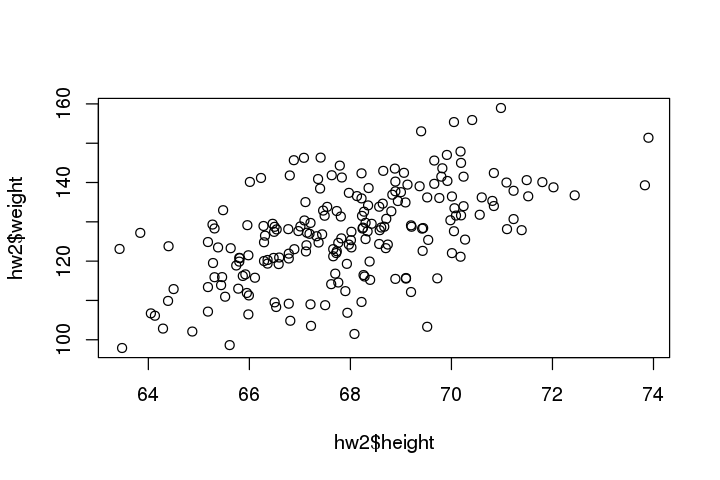

In [32]:
plot(hw2$height, hw2$weight)

## 3.4 Indexing
Within each data frame there is an implied set of coordinates, like latitude and longitude. But in frames, it is **rows** and **columns**. R has methods for working with data's coordinates directly. We have seen some of this above.

We generally do not need to pick out specific points in the data frame, just entire rows or columns. Or sets of rows within columns.

We can use the dollar sign notation with the square brackets. Since we will be using the dollar sign to pick out columns, the numbers in the square brackets will not nee the commas from above.

height,weight
65.78,112.99
71.52,136.49
69.40,153.03
68.22,142.34
67.79,144.30
68.70,123.30


[1] 65.78

[1] 65.78 71.52 69.40 68.22 67.79

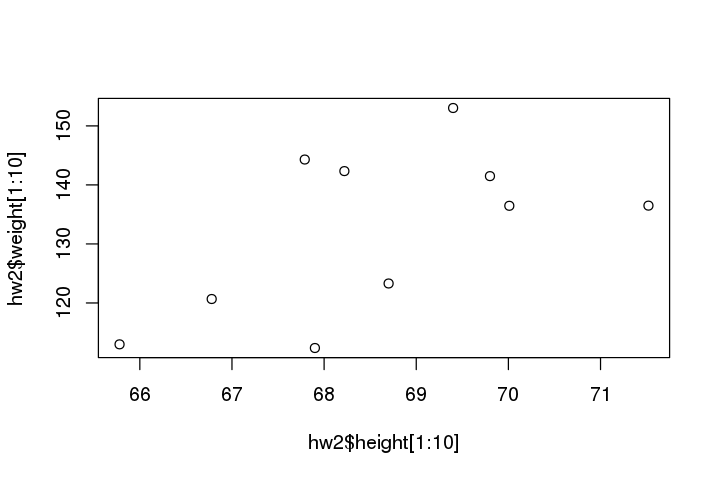

In [37]:
head(hw2)          # Print first six rows of hw2

hw2$height[1]      # First height
hw2$height[1:5]    # First 5 heights

plot(hw2$height[1:10], hw2$weight[1:10])  # Plot the first 10 people ONLY

In [ ]:
# Make a plot that only uses the first 100 data rows in the hw2 frame



### Logical Indices
R allows you to use an ordered list of truth values to index a data frame. This seems weird, but like a lot of weird things, it turns out to be useful.

We can use this to plot the height versus weight for **only** the people who are above the thrid quartile of height (69.2 inches). What we will do is the following:

1. Compare each height with 69.2, if greater than or equal to mark `TRUE` if not mark `FALSE`
1. Put these `TRUE` and `FALSE` results in a variable, here we use `ind`
1. Use this `ind` variable as an **index** inside the square brackets

Viz.

In [45]:
ind <- hw2$height >= 69.2   # This shows nothing in the output below!

print(ind)                  # The TRUE's and FALSE's below

hw2$height[ind]             # The numbers below; just the heights >= 69.2

  [1] FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [49]  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [73]  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
 [85]  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
[121] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE
[133] FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALS

[1] 71.52 69.40 69.80 70.01 71.09 71.23 70.84 69.52 70.60 71.80 69.21 69.66
[13] 69.82 69.91 70.27 70.18 70.41 70.81 70.84 69.92 69.72 70.05 69.20 70.09
[25] 70.18 70.24 71.49 69.20 70.06 70.56 69.44 70.05 70.19 70.01 69.76 69.42
[37] 70.24 71.23 71.10 73.90 69.98 69.52 69.54 72.44 70.98 72.02 69.37 69.43
[49] 73.83 70.19 69.66 71.39

In [ ]:
# Make the same plot as before, but with the heights and weights where
# height is greater than 69.2 inches
# Hint: use the last expression in the cell above
# Hint: Apply the same ind to both variables



As usual in R there is a shorthand way to do this: you do not need to create a new variable to hold the logical indices as an intermediate step (like we did with `ind` above), you can just stick the comparison directly into the square brackets!

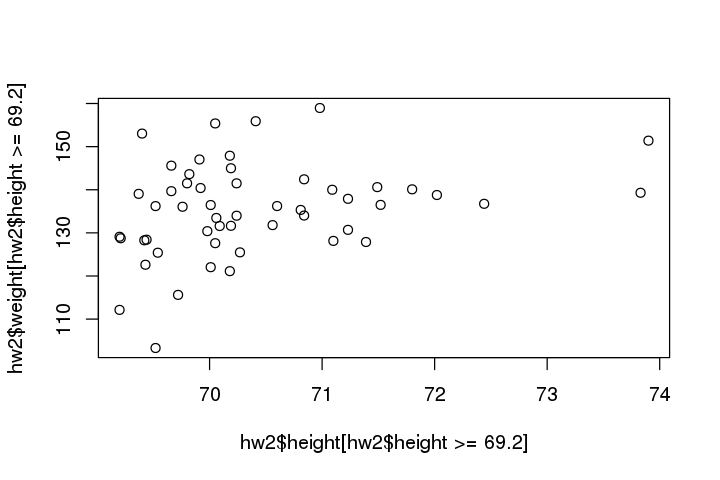

In [48]:
plot(hw2$height[hw2$height >= 69.2], hw2$weight[hw2$height >= 69.2])

Compare this to the plot you just made above. It should be the same.

For beginners this is harder to read, and it really messes up the labels for the x and y axes. But once you get used to it, it is an efficient way to pick out data that meets certain criteria. 

## 3.5 Subsetting Data

We can use logical indices to make subsets we might need. 

R provides many built-in data sets for practice and demonstration of statistical techniques. You can run `library(help = "datasets")` to get a list and then get help for each specific data set name to see the details. Most packages that get added to R will bring their own data in with them.

Here we use the **state** data. R provides **lists** of the various facts about states including their abbreviation (`states.abb`), their area (`states.area`; in square miles), and their region of the country (`state.region`; Northeast, South, North Central, West). 

Note that these lists are not data frames, they are just lists. (Try typing their names in a cell to see what they contain. We will put these lists together into a single data frame which has all three pieces of information for each state. For this we use the `data.frame` function.

In [52]:
# Look at the state.abb and state.area variables and describe them



In [53]:
# Make a data frame, s, from state data

s <- data.frame(name = state.abb, region = state.region, area = state.area)
head(s)
summary(s)

name,region,area
AL,South,51609
AK,West,589757
AZ,West,113909
AR,South,53104
CA,West,158693
CO,West,104247


      name              region        area       
 AK     : 1   Northeast    : 9   Min.   :  1214  
 AL     : 1   South        :16   1st Qu.: 37317  
 AR     : 1   North Central:12   Median : 56222  
 AZ     : 1   West         :13   Mean   : 72368  
 CA     : 1                      3rd Qu.: 83234  
 CO     : 1                      Max.   :589757  
 (Other):44                                      

In [60]:
# List all the states in the "Northeast" region

s$name[s$region == "Northeast"]

[1] CT ME MA NH NJ NY PA RI VT
50 Levels: AK AL AR AZ CA CO CT DE FL GA HI IA ID IL IN KS KY LA MA MD ... WY

In [ ]:
# List all of the states in the "South" region
# Also list all of there areas (this is a seperate list!)



In [64]:
s$name[s$region == "South"]
s$area[s$region == "South"]

[1] AL AR DE FL GA KY LA MD MS NC OK SC TN TX VA WV
50 Levels: AK AL AR AZ CA CO CT DE FL GA HI IA ID IL IN KS KY LA MA MD ... WY

[1]  51609  53104   2057  58560  58876  40395  48523  10577  47716  52586
[11]  69919  31055  42244 267339  40815  24181

## 2XXXX.6 Data XXXFramesXXX and InXXXXdexingXXX

Lists are great but in most problems we have many variables and many observations. A spreadsheet would be better for this. Let's make one.



That histogram is too big for most laptop displays! We can change the plotting options: run and adjust the cell below until you are happy. Keep in mind that you may distort the view with some settings!

Note: `repr` is short for representation. Graphics in R can be output in a variety of formats, either as displays in a notebook or RStudio, or as files for inclusion in publications.

In [ ]:
options(repr.plot.width=5, repr.plot.height=4) # Set plot height and width (in inches)

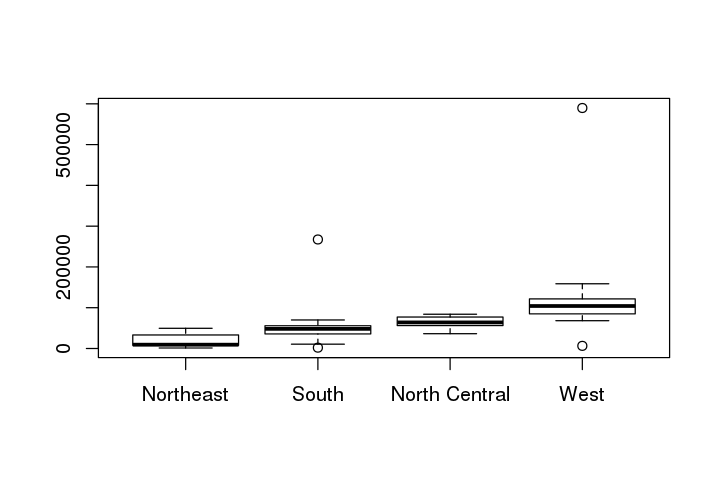

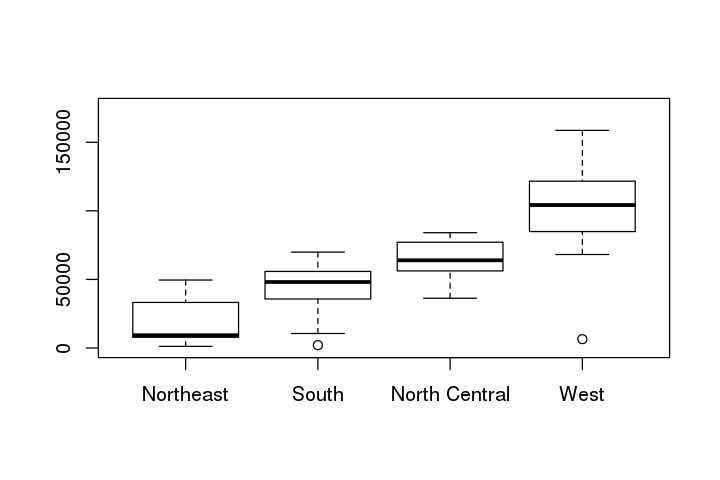

In [57]:
#s <- data.frame(name = state.abb, region = state.region, area = state.area)

#head(s)    # To see all of the states, just remove the 'head' function

# Next line stops scientific notation
options(scipen=999)     # Default value is 0 if you want to undo this

boxplot(area ~ region, data=s)

boxplot(area ~ region, data = s, ylim = c(0, 175000))

Now that we have the basics of data frames, indexing, and subsetting working, it is time to actually do some statistics. 

Version 1.0  
2018.06.06  

To contact the author, please email [mturner46@gsu.edu](mailto:mturner46@gsu.edu). Please contact me with recommendations for improvement or if you find any errors. This work may be adapted for any non-commercial purpose within the bounds of the license.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.